In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data_set = np.genfromtxt("hw05_data_set.csv", delimiter = ",",skip_header= True)

In [5]:
# get X and y values
X = data_set[:,0]
y = data_set[:,1].astype(int)

# get number of classes, number of samples, and number of features
K = np.max(y)
N = X.shape[0]
D = 1

# get train and test splits
train_indices = np.arange(150)
test_indices = np.setdiff1d(range(N), train_indices)

X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# get numbers of train and test samples
N_train = X_train.shape[0]
N_test = X_test.shape[0]

In [6]:
def rmse(y_truth, y_pred):
    r = np.sqrt(np.sum((y_truth-y_pred)**2) / len(y_truth))
    return r

In [7]:
def prediction(data_interval, node_splits, is_terminal, N):
    # traverse tree for training data points
    y_predicted = np.repeat(0, N)
    for i in range(N):
        index = 1
        while True:
            if is_terminal[index] == True:
                y_predicted[i] = node_splits[index]
                break
            else:
                if data_interval[i] > node_splits[index]:
                    index = index * 2
                else:
                    index = index * 2 + 1
    return y_predicted

In [8]:
def decision_tree_regression(p, N_train, X_train, y_train, D):
# create necessary data structures
  node_indices = {}
  is_terminal = {}
  need_split = {}
  node_splits = {}
  
# put all training instances into the root node
  node_indices[1] = np.array(range(N_train))
  is_terminal[1] = False
  need_split[1] = True
    
# learning algorithm
  while True:
     
    # find nodes that need splitting
    split_nodes = [key for key, value in need_split.items() if value == True]
   
    if len(split_nodes) == 0:
      break
    # find best split positions for all nodes
    for split_node in split_nodes:
      data_indices = node_indices[split_node]
      need_split[split_node] = False
      
      if len(data_indices) <= p:
        is_terminal[split_node] = True
        node_splits[split_node] = np.mean(y_train[data_indices])
      else:
        is_terminal[split_node] = False
        
        best_scores = np.repeat(0.0, D)
        best_splits = np.repeat(0.0, D)
        for d in range(D):
            unique_values = np.sort(np.unique(X_train[data_indices]))
            split_positions = (unique_values[1:len(unique_values)] + unique_values[0:(len(unique_values) - 1)]) / 2
            split_scores = np.repeat(0.0, len(split_positions))

            for s in range(len(split_positions)):
              left_indices = data_indices[X_train[data_indices] > split_positions[s]]
              right_indices = data_indices[X_train[data_indices] <= split_positions[s]]
              left_mean = np.mean(y_train[left_indices])
              right_mean = np.mean(y_train[right_indices])
              score_storer = 0
              score_storer += np.sum((y_train[left_indices]-left_mean)**2) + np.sum((y_train[right_indices] - right_mean)**2)
              split_scores[s] = score_storer / (len(data_indices))
            best_scores[d] = np.min(split_scores)
            best_splits[d] = split_positions[np.argmin(split_scores)]
        # decide where to split on which feature    
        split_d = np.argmin(best_scores)    
        node_splits[split_node] = best_splits[split_d]
        # create left node using the selected split
        left_indices = data_indices[X_train[data_indices] > best_splits[split_d]]
        node_indices[2 * split_node] = left_indices
        is_terminal[2 * split_node] = False
        need_split[2 * split_node] = True
        # create right node using the selected split
        right_indices = data_indices[X_train[data_indices] <= best_splits[split_d]]
        node_indices[2 * split_node + 1] = right_indices
        is_terminal[2 * split_node + 1] = False
        need_split[2 * split_node + 1] = True
        
  return node_splits, is_terminal

In [9]:
P = 25

In [11]:
node_splits, is_terminal = decision_tree_regression(P, N_train, X_train, y_train, D)

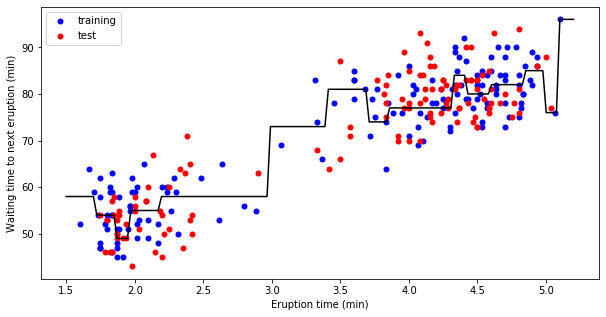

In [12]:
data_interval = np.linspace(1.5, 5.2, 150)
y_predicted = prediction(data_interval, node_splits, is_terminal, N_train)

plt.figure(figsize = (10, 5))
plt.plot(X_train,y_train,"b.", markersize = 10)
plt.plot(X_test,y_test,"r.", markersize = 10)
plt.xlabel("Eruption time (min)")
plt.ylabel("Waiting time to next eruption (min)")
plt.plot(data_interval, y_predicted, "k-")
plt.legend(["training", "test"], loc ="upper left")

In [13]:
y_predicted_train = prediction(X_train, node_splits, is_terminal, N_train)
rmse_train = rmse(y_train, y_predicted_train)
print("RMSE on training set is {} when P is {}".format(rmse_train, P))

RMSE on training set is 4.550457852421739 when P is 25


In [14]:
y_predicted_test = prediction(X_test, node_splits, is_terminal, N_test)
rmse_test = rmse(y_test, y_predicted_test)
print("RMSE on test set is {} when P is {}".format(rmse_test, P))

RMSE on test set is 6.437594500340921 when P is 25


In [15]:
pre_pruning_parameters = np.linspace(5,50,10).astype(int)
print(pre_pruning_parameters)

[ 5 10 15 20 25 30 35 40 45 50]


In [17]:
rmse_test_storer = np.array([])
rmse_train_storer = np.array([])
for i in pre_pruning_parameters:
    node_splits1, is_terminal1 = decision_tree_regression(i, N_train, X_train, y_train, D)
    y_predicted_train1 = prediction(X_train, node_splits1, is_terminal1, N_train)
    rmse_train_1 = rmse(y_train, y_predicted_train1)
    y_predicted_test1 = prediction(X_test, node_splits1, is_terminal1, N_test)
    rmse_test_1 = rmse(y_test, y_predicted_test1)
    rmse_train_storer = np.append(rmse_train_storer, rmse_train_1)
    rmse_test_storer = np.append(rmse_test_storer, rmse_test_1)

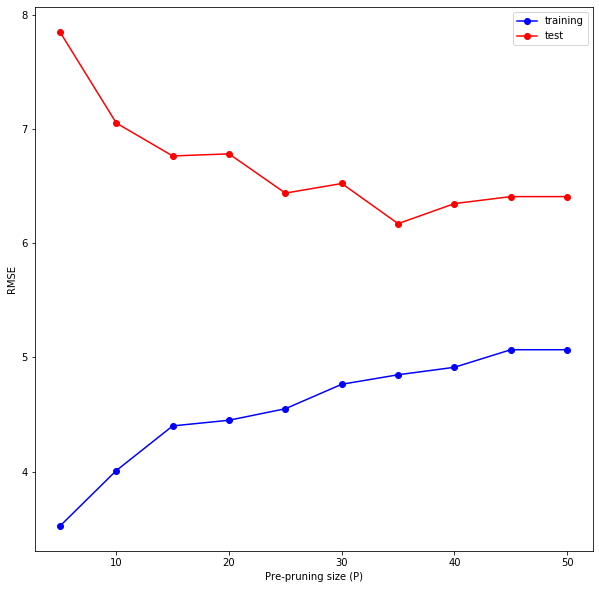

In [18]:
plt.figure(figsize = (10, 10))
plt.plot(pre_pruning_parameters, rmse_train_storer, "bo-", )
plt.plot(pre_pruning_parameters, rmse_test_storer, "ro-")
plt.xlabel("Pre-pruning size (P)")
plt.ylabel("RMSE")
plt.legend(["training", "test"], loc ="upper right")